# <center> A random collection of Python implementation notes I </center>

Here, we shall learn a random collection of useful **Python** and **Jupyter** tips, tricks and implementation details that I have learned and may not have been tackled in [CP] or [PfCP]. In this part, we shall be concentrating on the Python-side of things. Part II will concern itself with Jupyter and the standard scientific computing library

## <center> Dynamic typing and Python protocols </center>

To peel away at the mysteries of Python's dynamic typing, one must understand first that Python is an object-oriented programming (OOP) language. The central object (*ba-dum-tss*) of any OOP is the **object**, which has two parts: **fields** and **methods**. Fields are properties which may be read, copied and mutated. These may be integers, strings, or lists of data. These fields are to be manipulated and mutated by a set of instructions, called methods.

Python, as a matter of fact, may be the *most* object-oriented language out there. This is because, in Python, there is effectively only one variable type: **objects**. That is...

### <center> Everything<sup>(almost)</sup> in Python is an object! </center>

Integers, strings and lists in Python are all objects. What you are actually doing when you define an integer, say

In [ ]:
a = 2

... is defining an *object*, with all sorts of properties and functions. Don't believe me? Look!

In [ ]:
print(a.__str__())
print(a.__bool__())
print(a.__float__())

2
True
2.0


By define an integer two, we have also defined it's string value, boolean and float, revealed by calling this special functions. But wait a minute... when these functions returns a string or a float... aren't these Python-ic objects as well? Yes.

In [ ]:
a.__float__().__bool__()

True

Is this a case of 'Turtles all the way down,' except with objects? Nope! 

The fields of integers, strings and lists you'd expect from statically-typed programming languages is the purview of your Python interpreter (most likely CPython), and you cannot get at them by any normal means. You can only call functions which, behind the scenes, reads these fields, and spits out a Python object. 

By the very design philosophy of Python, you as a user are only supposed to ever interact with dynamically-typed Python objects. Of course, Python knows the intent of what you have defined. You can simply check the variable type.

In [ ]:
type(a)

int

Each classic data type (such as strings, integers, floats, and lists) are all Pythonic objects, and within each of those objects are functions defining how they may be added, subtracted or multiplied.

In [ ]:
a_adder = a.__add__
a_subtracter = a.__sub__
a_multiplier = a.__mul__

These are the functions responsible for figuring out what to do when an integer is multiplied to a string. There is a lot going on behind the scenes when one types and evaluates

In [ ]:
a = 2
string = "Message"
print(a * string)

MessageMessage


It first gets the multiplier of **a**, and tries to input **string**, as in

In [ ]:
a.__mul__(string)

NotImplemented

This exercise reveals an integer object does not know how to multiply strings. However, string objects know. And thus, this is what is kept when one multiplies an integer and a string.

In [ ]:
string.__mul__(a)

'MessageMessage'

Well, not exactly. What is being called *technically* is string.\_\_rmul\_\_(a), since (**a** \* **string**) failed, so it's doing the symmetric operation (**string** * **a**). 

Anyways, notice that **a** should have a string field, and yet you cannot add **a** and **string** together.

In [ ]:
a + string

TypeError: unsupported operand type(s) for +: 'int' and 'str'

It is in this sense that Python is said to be a **strongly typed language**. That is, although it should in principle be able to add **a** and **string** together to yield a string '2Message', Python refuses to do such a thing and raises an error.

This is, again, one of the many design choices made by the developers of Python. When ints and strings multiply, Python assumes that you know what you are doing. When they add, Python assumes that something has gone wrong, and so raises an error. You'd need to go through the trouble of converting the integer into a string first if it is your desire to get the string '2Message'

In [ ]:
str(a) + string

A lot of unintuitive things may arise when two different variable types collide. Consider,

In [ ]:
print(False * 2)
print(True * 2)

One may roughly understand the above as the following. The field of a **False** boolean Python object under integers is 0, whereas the field of a **True** boolean Pythonic object under integers is 1.

In [ ]:
print(False.__int__())
print(True.__int__())

Thus, when Python tries to parse the above operations, what it eventually sees when it does all the checking and cross checking of variable types and operations is the basic integer multiplication of 0 * 2 and 1 * 2. This is also why the following occurs:

In [ ]:
n = int(input("Input any non-zero integer: "))
if n:
    print("True")
else:
    print("False")
    
n = int(input("Now input 0: "))
if n:
    print("True")
else:
    print("False")

The **if** function expects a boolean. So it peeks under the hood, checks the boolean field of the object inputted, and evaluates. We can just check how these are implemented behind the scenes.

In [ ]:
n = int(input("Input any non-zero integer: "))
print(n.__bool__())
    
n = int(input("Now input 0: "))
print(n.__bool__())

As a final note, notice that the functions we had called here are all surrounded with double underscores. These are called **Python protocols**. The ones we've discussed here are *numeric emulation*-type Python protocols, which are called whenever binary (takes two inputs) arithmetic operations like + or - are used.

For example, \_\_mul\_\_() gets called whenever an operation has a * in it. It is in this manner that you can define operations of more complicated objects.

This is also why you can add numpy lists together and multiply scalar values to them, in the way you expect vectors to behave.

In [ ]:
import numpy as np

start = 0
end = 1
n = 1000

vec_1 = np.linspace(start, end, n)
vec_2 = np.linspace(start, 2*end, n)

print( (vec_1+vec_2)[0:10] )
print( (3*vec_1)[0:10] )

These definitions and behaviours are defined for each variable type at C-level. Somewhere in the definition of the numpy array object is it interfacing with the C API of Python. Everytime a user tries to generate one, the Python interpreter reads this C code and creates a Python object with the correct \_\_add\_\_() and \_\_mul\_\_() Python protocols.

In [ ]:
vec_1.__add__

This behaviour is distinct to how Python arrays would behave.

In [ ]:
array_1 = [1,2,3]
array_2 = [4,5,6]

print(array_1+array_2)
print( 3 * array_2 )

Python assumes that with default Python arrays, you are a computer scientist trying to concatenate lists together. With NumPy, they're assuming you're doing numerical work, so it is more natural that they behave more like vectors.

This fact (that you can define operations for Python objects) might save you a lot of time and head-ache in the future, especially if you are going to wrap legacy C++ code written 50 years ago with a Python interface lol

There are others, related to for example augmented arithmetic assignments (your '+=' operators) and unary operations like taking the negative of a numeric object. Your str() and bool() functions are simply special keywords that call the string Python protocol \_\_str\_\_() and bool Python protocol \_\_bool\_\_().

You don't need to learn Python's C API to define such behaviours. One can simply "overload" (a fancy computer science term for "overwrite") these functions by defining objects with these Python protocols.

In [ ]:
class ImmovableInt:
    def __init__(self, n):
        self.int = n
    
    def __str__(self):
        return str("wow")
    
    def __add__(self, other):
        return self.int
    
    def __radd__(self,other):
        return self.int
    
a = ImmovableInt(5)

wow


## <center> String formatting </center>

Now that we know that everything is an object in Python, we may now discuss built-in methods for these objects which may be particularly useful. One basic function, but may change your Python life, is the **format** function for strings. Consider the following function:

In [ ]:
def print_sum():
    """
    Gets two integers and prints out their sum
    """
    a = int(input("Input first integer: "))
    b = int(input("Input second integer: "))
    
    print(a+b)
    
print_sum()

Input first integer: 1
Input second integer: 2
3


Notice that the output of the function is not particularly readable. What is 3? One naive way of dealing with this is the following:

In [ ]:
def print_sum():
    """
    Gets two integers and prints out their sum with a message
    """
    a = int(input("Input first integer: "))
    b = int(input("Input second integer: "))
    
    string = "The sum is " + str(a+b) #convert a + b into a string
    
    print(string)
    
print_sum()

Input first integer: 1
Input second integer: 2
The sum is 3


Suppose we wish to also say what the first integer is and the second integer is. This naive way is on its way to being incredibly unreadable and unmaintainable.

In [ ]:
def print_sum():
    """
    Gets two integers and prints out their sum with a message
    which includes what the inputs were
    """
    a = int(input("Input first integer: "))
    b = int(input("Input second integer: "))
    
    string = "The first integer is " + str(a) + ". The second integer is " + str(b) + ". The sum is " + str(a+b)
    
    print(string)
    
print_sum()

Input first integer: 1
Input second integer: 2
The first integer is 1. The second integer is 2. The sum is 3


Enter the **f-string**. The Pythonic idiom is quite simple. One adds a prefix 'f' on the string, and place variables to be printed inside the string inside curly braces.

In [1]:
def print_sum():
    """
    Gets two integers and prints out their sum with a message
    which includes what the inputs were, using f-strings
    """
    a = int(input("Input first integer: "))
    b = int(input("Input second integer: "))
    
    string = f"The first integer is {a}. The second integer is {b}. The sum is {a+b}."
    
    print(string)
    
print_sum()

Input first integer: 1
Input second integer: 2
The first integer is 1. The second integer is 2. The sum is 3.


This is so much more readable. We may also

## <center> Assignments and multiple assignments </center>

Part of the usefulness of Python is the primacy of readability in its design. One of the key features in Python is how one can unpack, pack and manipulate sets of data intuitively. Consider the following piece of code, which mimicks roughly how one would usually write something in Java or C++.

In [ ]:
#defns
numbers = [1, 2, 3, 4, 5]

#calc
n = len(numbers)
SUM = 0
for i in range(n):
    SUM += numbers[i]
print(SUM)

15


There are several features which makes this slightly unreadable. There is the need to find out the length of the list, the definition of a variable that goes through each list index one by one, and only then do we get to the main point of the program, which is to get the sum of the numbers in the list **numbers**. 

In Python, we can instead use its rich assignment features to just do the following:

In [ ]:
#defns
numbers = [1, 2, 3, 4, 5]

#calc
SUM = 0
for number in numbers:
    SUM += number
print(SUM)

15


Here, we immediately know what is going on. We are going to take a **number** from the list **numbers** and then add it to **SUM**. No extra syntax required that are unrelated to this task.

Another related assignment feature is multiple assignment. Say you have two variables, and you wish to switch their values around. For other programming langauges, one might do the following:

In [ ]:
#defns
a = 1
b = 2

#calc
print("a is equal to {0}, b is equal to {1}".format(a, b))

print("Switching a <-> b")
c = b
a = b
b = c

print("Now, a is equal to {0}, b is equal to {1}".format(a, b))

a is equal to 1, b is equal to 2
Switching a <-> b
Now, a is equal to 2, b is equal to 2


We had to name a third variable, and need to keep in mind where each variable value is going as we are doing the switching. Now imagine doing this for 3 or more variables!

Well, we can imagine just that in Python.

In [ ]:
#defns
a = 1
b = 2
c = 3
d = 4

#calc
print("a = {0}, b = {1}, c = {2}, d = {3}".format(a,b,c,d))

print("Switching complicatedly...")

(a,b,c,d) = (b,c,a,d)

print("Now, a = {0}, b = {1}, c = {2}, d = {3}".format(a,b,c,d))

a = 1, b = 2, c = 3, d = 4
Switching complicatedly...
Now, a = 2, b = 3, c = 1, d = 4


I think you can agree the Python way is much more elegant looking. Not only is this more readable, it's safer **exactly because** it is so readable. We know where each variable is headed to **immediately**. But wait, there's more: this multiple assignment is done at C-speed, so not only is this the better way, it is also the **faster** way. We may use this in a simple fibonacci function.

In [ ]:
def fib(n, f_1 = 1, f_2 = 1):
    """
    Returns the nth Fibonacci number, starting with f_1 = 1, f_2 = 1
    """
    for _ in range(1, n):
        (f_1, f_2) = (f_2, f_1 + f_2)
    return f_1

n = int(input("Which Fibonacci number would you like to calculate? "))
print("The {0}th Fibonacci number is {1}".format(n, fib(n)))

Which Fibonacci number would you like to calculate? 15
The 15th Fibonacci number is 610


This multiple assignment feature also exists in for loops. Consider the following code, where we have used the **zip** functions to stitch the two lists together

In [ ]:
#defns
names = ["Mary", "Jerry", "Louise"]
heights = [164, 155,180]

#calc
for (name, height) in zip(names, heights):
    print("{0} has a height of {1} cm".format(name, height))

Mary has a height of 164 cm
Jerry has a height of 155 cm
Louise has a height of 180 cm


## <center> On numeric literals </center>

Has this ever happened to you? You define an integer that is supposed to be some large number, and then as you code, you immediately forget how large that number is at a glance. Quick! Is the following number 100 million or 10 million? 100000000. 

Did you take a long time counting the zeros? We usually count commas to get an idea how large a number is! This is why we use delimitters in every day use. For English speakers, it is tradition to split a number every three orders of magnitude. Reading 100,000,000, we immediately know that this number is 100 million and not 10 million. We can do the same thing in Python using underscores.

In [ ]:
n1 = 1_000_000
n2 = 10_000_000
n3 = 100_000_000

Note that the only limitation is that there should be no adjacent underscores. Barring this limitation, we may split the number in any way we want.

In [ ]:
n4 = 10_00_00

This also works on floating points, although Jupyter might get confused with the coloring.

In [ ]:
C = 1.602_176_62e-19
print(C)

1.60217662e-19


## <center> On docstrings </center>

Has this ever happened to you? You have defined a function loaded with a long list of variable inputs a few paragraphs ago, and you have forgotten the order at which the inputs must be given? Or maybe you've forgotten what inputs must be supplied in the first place! So you do the dance of scrolling up and down your Jupyter notebook just to figure out the correct way to call a function.

A useful shortcut is Shift+Tab, which pulls up the signature (the order and names of the input arguments) and the docstring of a function. Try it out:

In [ ]:
fib

<function __main__.fib(n, f_1=1, f_2=1)>

This is why writing documentation is for your own good. One can future-proof your code by writing a more detailed docstring, which may include

1. A short description of your function
2. A short description of each input
3. A short description of the expected output

There are others you can supply, and not all of this may be vital. It depends on the mixture of how much energy you have for banal work and how simple or complicated your project is. For example, we may do something like

In [ ]:
def fib(n, f_1 = 1, f_2 = 1):
    """
    Calculates Fibonacci numbers, starting with f_1 = 1, f_2 = 1
    
    n : The index of the target Fibonnaci number
    f_1 : The first Fibonnaci number in your sequence, defaults to 1
    f_2 : The second Fibonnaci number in your seqquence, defaults to 1
    
    Returns the nth Fibonnaci number
    """
    for _ in range(1, n):
        (f_1, f_2) = (f_2, f_1 + f_2)
    return f_1

Of course, this might seem facetious in this code sample. You already know very well the context of a Fibonacci number. But it'll become vital when you work on larger and more complicated projects. Your future self will thank you, for doing some extra work in the present so that they won't have to.

## <center> For loops vs while loops </center>

This entire subsection lifts its material from the following video: https://www.youtube.com/watch?v=Qgevy75co8c

It must be stressed that there is a bias against **while** loops in Python, especially if one is just iterating over a certain list of numbers. Consider the following pieces of code, which is doing the same thing

In [ ]:
def sum_while(n):
    """
    Sums the first n positive integers using a while loop
    """
    i = 0
    SUM = 0
    while i <= n:
        SUM += i
        i += 1
    return SUM

def sum_for(n):
    """
    Sums the first n positive integers using a for loop
    """
    SUM = 0
    for i in range(n+1):
        SUM += i
    return SUM

We shall time these two functions using a very primitive and inaccurate method, with the **time** module. The time() function in this module gets the current time, so we can roughly measure how long a function took to run by simply calling it before and after and take the difference.

In [ ]:
import time

#defns
n = int(input("How many integers would you like to sum and compare? "))

start = time.time()
sum_while(n)
tottime_while = time.time() - start
print("sum_while function took {0} s to sum {1} integers".format(tottime_while, n))

start = time.time()
sum_for(n)
tottime_for = time.time() - start
print("sum_for function took {0} s to sum {1} integers".format(tottime_for, n))

print("The for loop is {0} times faster than the while loop".format(tottime_while/tottime_for))

How many integers would you like to sum and compare? 100000000
sum_while function took 8.61872410774231 s to sum 100000000 integers
sum_for function took 5.510751247406006 s to sum 100000000 integers
The for loop is 1.5639835152782977 times faster than the while loop


Notice that **sum_while** always takes around twice as long as **sum_for** loop. This actually makes perfect sense if you know what is going on behind the scenes.

The for loop is iterating at C-speed. As it picks out each element and runs through the list of integers, everything is calculated in pristine, statically-typed compiled code, at the express care of your Python interpreter. The while loop, on the other hand, calculates the next integer with a Python-ic object **i**. This comes with it all the usefulness and baggage of a Python variable.

Since Python is dynamically typed, Python still needs to check what variable type **i** is, what variable type the number being added to it is (the integer 1). Then it notices there is an addition operation, so it still needs to find out how these two variables (which may have different variable types) may be added together (by calling, as we now know, the proper Python protocol).

Of course, we know that **i** and **1** are both integers. But Python doesn't know that! So it needs to do this complicated dance of checking and cross checking just to add two variables. The convenience we get for being able to multiply strings and integers and floating points together comes with it slower run times.

The same thing happens with the variable **SUM**. However, notice that **sum_while** goes through two Pythonic arithmetic operations, while **sum_for** only goes through one Pythonic arithmetic operation. We may add an extraneous Pythonic addition just to confirm the intuition that the two pieces of code becomes comparable in speed.

In [ ]:
def sum_for_but_slower(n):
    """
    In which we add an extra arithmetic operation 
    as you go through summing the integers
    """
    SUM = 0
    extra = 0
    for i in range(n+1):
        SUM += i
        extra += 1
    return SUM

To test our hypothesis, consider the following piece of code. Notice that the time the slower for function runs is always almost as fast as our original while loop for larger and larger **n**.

In [ ]:
#defns
n = int(input("How many integers would you like to sum and compare? "))

start = time.time()
sum_while(n)
tottime_while = time.time() - start

start = time.time()
sum_for(n)
tottime_for = time.time() - start

start = time.time()
sum_for_but_slower(n)
tottime_for2 = time.time() - start

print("The for loop is {0} times faster than the while loop".format(tottime_while/tottime_for))
print("The slower for loop is {0} times faster than the while loop".format(tottime_while/tottime_for2))

How many integers would you like to sum and compare? 100000000
The for loop is 1.5537983584237385 times faster than the while loop
The slower for loop is 1.0920529246719393 times faster than the while loop


We are on the verge here of discovering what **decorators** are and how they are useful. Notice that in measuring the runtime of a certain function, there is a very routine set of instruction:
1. get the time
2. run the function
3. get the time
4. calculate the difference between start and finish

There must be an easier way to implement this pattern of instruction, for arbitrary functions... Anyways, I defer this discussion to a later date, since it is more important you get your basics solid first before we can discuss these advance level concerns.

In [1]:
def fib1(n, cache={0: 0, 1: 1}):
    try:
        output = fib1.cache.get(n)
        if output == None:
            fib1.cache[n] = fib1(n-2) + fib1(n-1)
            return fib1.cache[n]
        else:
            return output
    except AttributeError:
        fib1.cache = cache
        
def fib2(n, cache={0: 0, 1: 1}):
    try:
        if n in fib2.cache:
            return fib2.cache[n]
        else:
            output = fib2(n-2)+fib2(n-1)
            fib2.cache[n] = output
            return output
    except AttributeError:
        fib2.cache = cache
        
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        (fibn,fibnm1)= (0,1)
        for _ in range(n-1):
            (fibn,fibnm1) = (fibn + fibnm1,fibn)
        return fibn

In [1]:
import time 

In [4]:
start = time.time()
val1=fib(200_000)
print(time.time()-start)
start = time.time()
for n in range(0,200_000,1000):
    fib1(n)
val2=fib1(200_000)
print(time.time()-start)

0.4969022274017334
0.0002334117889404297


In [12]:
print(val2)

None


In [47]:
inspect.getfullargspec(fib2).defaults

({0: 0,
  1: 1,
  2: 1,
  3: 2,
  4: 3,
  5: 5,
  6: 8,
  7: 13,
  8: 21,
  9: 34,
  10: 55,
  11: 89,
  12: 144,
  13: 233,
  14: 377,
  15: 610,
  16: 987,
  17: 1597,
  18: 2584,
  19: 4181,
  20: 6765,
  21: 10946,
  22: 17711,
  23: 28657,
  24: 46368,
  25: 75025,
  26: 121393,
  27: 196418,
  28: 317811,
  29: 514229,
  30: 832040,
  31: 1346269,
  32: 2178309,
  33: 3524578,
  34: 5702887,
  35: 9227465,
  36: 14930352,
  37: 24157817,
  38: 39088169,
  39: 63245986,
  40: 102334155,
  41: 165580141,
  42: 267914296,
  43: 433494437,
  44: 701408733,
  45: 1134903170,
  46: 1836311903,
  47: 2971215073,
  48: 4807526976,
  49: 7778742049,
  50: 12586269025,
  51: 20365011074,
  52: 32951280099,
  53: 53316291173,
  54: 86267571272,
  55: 139583862445,
  56: 225851433717,
  57: 365435296162,
  58: 591286729879,
  59: 956722026041,
  60: 1548008755920,
  61: 2504730781961,
  62: 4052739537881,
  63: 6557470319842,
  64: 10610209857723,
  65: 17167680177565,
  66: 27777890035288,


In [33]:
fib2.keywords

AttributeError: 'function' object has no attribute 'keywords'

In [2]:
def get_collatz_length(n):
    i = 0
    while(n > 1):
        if n % 2 == 0:
            n /= 2
            i += 1
        else:
            n = (3*n + 1)/2
            i += 2
    return i

In [24]:
get_collatz_length(4)

2

In [2]:
def get_collatz_length2(n, cache = {1:0}):
    i = cache.get(n)
    if i == None:
        if n % 2 == 0:
            i = get_collatz_length2(n/2) + 1
            cache[n] = i
        else:
            i = get_collatz_length2(3*n+1) + 1
            cache[n] = i
    return i

In [6]:
start = time.time()
data = []
for n in range(10_000_000):
    data.append(get_collatz_length(n+1))
print(time.time() - start)

210.28978562355042


In [3]:
start = time.time()
data1 = []
for n in range(10_000_000):
    data1.append(get_collatz_length2(n+1))
print(time.time() - start)

17.195755004882812


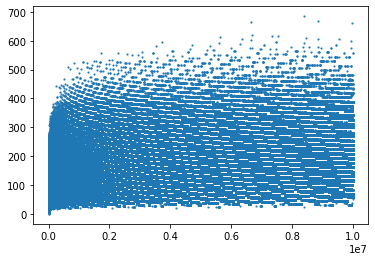

In [7]:
import matplotlib.pyplot as plt

plt.plot(data1,'s',markersize=1)

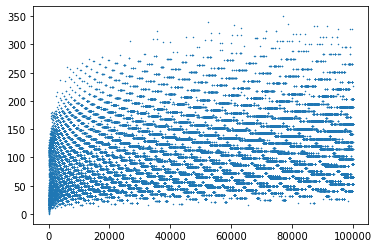

In [16]:
plt.plot(data1,'s',markersize=0.5)

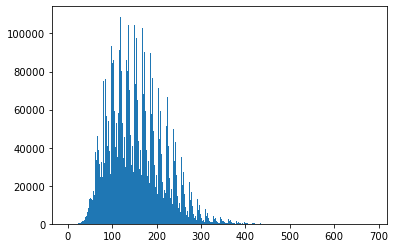

In [9]:
plt.hist(data1,bins=max(data1)+1)
plt.show()

In [4]:
a = (1,2)

In [5]:
a[1]

2

In [6]:
a[1] = 3

TypeError: 'tuple' object does not support item assignment